In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [4]:
IMAGE_SIZE = [224, 224]

train_path = 'C:/Users/Pratap ksp/vechicles/train'
valid_path = 'C:/Users/Pratap ksp/vechicles/test'


In [5]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


58892288/58889256 [==============================] - 435s 7us/step


In [6]:
# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [7]:
folders = glob('C:/Users/Pratap ksp/vechicles/train/*')


In [8]:
vechicle=os.listdir(train_path)
vechicle.sort()
vechicle


['bike',
 'boat',
 'bus',
 'car',
 'cycle',
 'helicopter',
 'plane',
 'scooty',
 'truck']

In [9]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [10]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [11]:
# view the structure of the model
model.summary()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [12]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [13]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 468 images belonging to 9 classes.


In [15]:
test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 72 images belonging to 9 classes.


In [16]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)


Epoch 1/5
30/30 [==============================] - 219s 7s/step - loss: 1.7055 - accuracy: 0.5363 - val_loss: 1.1458 - val_accuracy: 0.7083
Epoch 2/5
30/30 [==============================] - 225s 8s/step - loss: 0.4226 - accuracy: 0.8568 - val_loss: 0.3101 - val_accuracy: 0.7639
Epoch 3/5
30/30 [==============================] - 223s 7s/step - loss: 0.1878 - accuracy: 0.9444 - val_loss: 0.4112 - val_accuracy: 0.7639
Epoch 4/5
30/30 [==============================] - 224s 7s/step - loss: 0.1322 - accuracy: 0.9615 - val_loss: 0.9263 - val_accuracy: 0.7500
Epoch 5/5
30/30 [==============================] - 222s 7s/step - loss: 0.0824 - accuracy: 0.9829 - val_loss: 0.2461 - val_accuracy: 0.8056


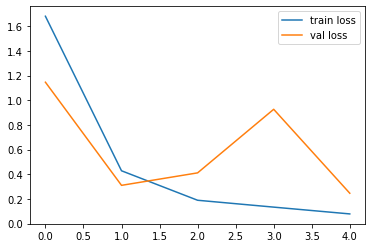

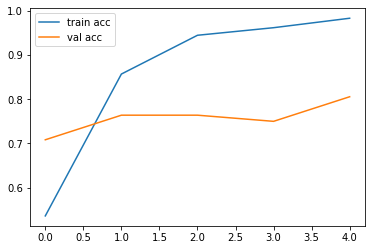

<Figure size 432x288 with 0 Axes>

In [17]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


In [18]:
import tensorflow as tf

from keras.models import load_model

model.save('model_vgg19.h5')

In [25]:
from keras.models import load_model
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
model = load_model('model_vgg19.h5')
img = image.load_img('C:/Users/Pratap ksp/vechicles/test/truck/Z (7).jpg', target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
classes = model.predict(img_data)


In [26]:
classes

array([[0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [27]:
top3=sorted(range(len(classes[0])), key=lambda i: classes[0][i])[-3:]
top3.reverse()


In [28]:
print(top3)

[8, 7, 6]


In [29]:
for i in top3:
    print(i)
    print(str(vechicle[i])+": %"+str(classes[0][i]*100)+"\n")

8
truck: %100.0

7
scooty: %0.0

6
plane: %0.0

